In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../first/training.csv').drop(columns=['Unnamed: 0'])

In [3]:
#Remove certain outliers. total_proppant, total_fluid, proppant_i|ntensity with quantile 0.99 for df_well
df = df[df['total_fluid'] < df['total_fluid'].quantile(0.99)]
print(df.shape)
df = df[df['total_proppant'] < df['total_proppant'].quantile(0.99)]
print(df.shape)
df = df[df['proppant_intensity'] < df['proppant_intensity'].quantile(0.99)]
print(df.shape)
df = df[df['proppant_to_frac_fluid_ratio'] < df['proppant_to_frac_fluid_ratio'].quantile(0.99)]
print(df.shape)
df = df[df['frac_fluid_to_proppant_ratio'] < df['frac_fluid_to_proppant_ratio'].quantile(0.994)]
# print(df.shape)
df = df[df['OilPeakRate'] < df['OilPeakRate'].quantile(0.99)]
print(df.shape)



(18885, 30)
(18294, 30)
(18007, 30)
(17826, 30)
(16532, 30)


In [5]:
for col in df.columns:
    s2 = ['total_fluid', 'total_proppant', 'proppant_intensity', 'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio', 'OilPeakRate']
    if col in s2:
        df = df[df[col] < df[col].quantile(0.995)]

df = df[df['bin_lateral_length'] >=1]
df.shape

(15890, 30)

In [6]:
df.dropna(subset=['OilPeakRate'], inplace=True)
df.shape

(15890, 30)

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

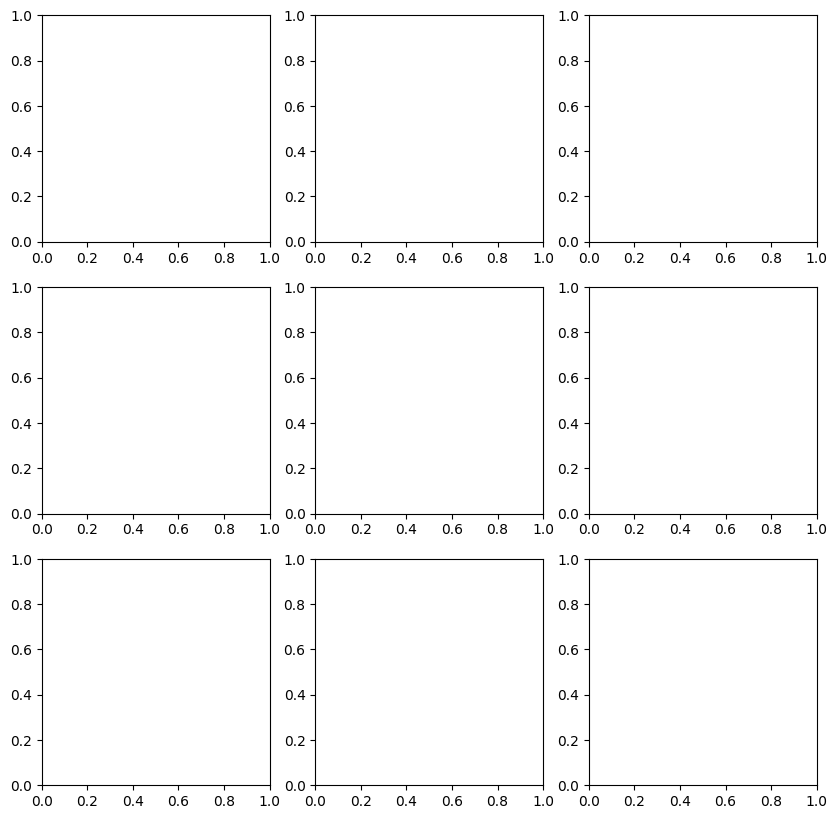

In [11]:
fig, axes = plt.subplots(figsize=(10,10), ncols=3, nrows=3)
axes.flatten()
for i,col in enumerate(df.columns):
    
    if col != 'OilPeakRate':
        sns.histplot(x=col, y='OilPeakRate', data=df, ax=axes[i])
        plt.show()

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15890 entries, 1 to 29436
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     15890 non-null  float64
 1   surface_y                     15890 non-null  float64
 2   bh_x                          14798 non-null  float64
 3   bh_y                          14798 non-null  float64
 4   standardized_operator_name    15890 non-null  int64  
 5   gross_perforated_length       15890 non-null  float64
 6   number_of_stages              2406 non-null   float64
 7   total_proppant                15890 non-null  float64
 8   total_fluid                   15890 non-null  float64
 9   true_vertical_depth           15864 non-null  float64
 10  ffs_frac_type                 12723 non-null  object 
 11  proppant_intensity            15890 non-null  float64
 12  frac_fluid_intensity          15890 non-null  float64
 13  a

### First filling

In [7]:
df_to_fill = df[['bh_x', 'bh_y', 'horizontal_toe_x', 'horizontal_toe_y', 'horizontal_midpoint_x', 'horizontal_midpoint_y', 'bin_lateral_length','number_of_stages','total_fluid']]

# Create train set, all non nan

df_to_train = df_to_fill.dropna()
df_to_train

,bh_x,bh_y,horizontal_toe_x,horizontal_toe_y,horizontal_midpoint_x,horizontal_midpoint_y,bin_lateral_length,number_of_stages,total_fluid
2,1.379275e+06,713471.9952,1.378960e+06,713530.4490,1.379357e+06,715381.2327,1.0,12.0,1.621424e+06
3,1.382891e+06,702068.3838,1.382727e+06,702098.4882,1.383100e+06,704058.8508,1.0,11.0,4.377134e+05
6,1.387981e+06,711336.8008,1.388175e+06,711314.4740,1.387788e+06,709283.6808,1.0,10.0,8.479442e+05
12,1.381269e+06,706975.8566,1.381428e+06,706932.7923,1.380950e+06,705038.8183,1.0,11.0,6.863401e+05
35,1.384198e+06,701947.6437,1.383893e+06,702156.9475,1.384375e+06,704256.0540,1.0,11.0,1.016599e+06
...,...,...,...,...,...,...,...,...,...
29397,9.166679e+05,947182.1123,9.166674e+05,947182.2070,9.160152e+05,945844.9223,1.0,10.0,2.563115e+06
29403,9.207482e+05,940679.3306,9.208283e+05,940630.4381,9.225351e+05,939867.1751,1.0,10.0,1.188984e+06
29411,9.334264e+05,930617.2114,9.334245e+05,930609.4472,9.350420e+05,929820.2619,1.0,15.0,1.014801e+06
29425,9.322816e+05,952752.7954,9.322833e+05,952750.6668,9.340959e+05,951876.2004,1.0,16.0,3.179996e+06


In [8]:



features = df_to_train.drop(columns=['number_of_stages'])
target =  df_to_train['number_of_stages']



scaler = StandardScaler()
features = scaler.fit_transform(features.values)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict using tahe model
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2_score = r2_score(y_test, rf_predictions)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2 Score:", rf_r2_score)


Random Forest RMSE: 4.881817577208602
Random Forest R2 Score: 0.867178193216539


In [9]:
def predict_number_of_stages(row):
    if not pd.isna(row['number_of_stages']):
        return row['number_of_stages']
    else:
        row = row[['bh_x', 'bh_y', 'horizontal_toe_x', 'horizontal_toe_y', 'horizontal_midpoint_x', 'horizontal_midpoint_y', 'bin_lateral_length','total_fluid']]
        if row.isna().sum() > 0:
            return np.nan
        else:
            # print(row.values)
           
            row = scaler.transform(row.values.reshape(1, -1))
            out = rf_model.predict(row.reshape(1, -1))[0]
           
            return out
    
df['number_of_stages'] = df.apply(predict_number_of_stages, axis=1)

### Fill Average_Stage_length

In [10]:
df_to_fill = df[['bh_x', 'bh_y', 'horizontal_toe_x', 'horizontal_toe_y', 'horizontal_midpoint_x', 'horizontal_midpoint_y', 'bin_lateral_length','number_of_stages','total_fluid','average_stage_length' ]]

# Create train set, all non nan

df_to_train = df_to_fill.dropna()

In [11]:



features = df_to_train.drop(columns=['average_stage_length'])
target =  df_to_train['average_stage_length']


# add standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features.values)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict using tahe model
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2_score = r2_score(y_test, rf_predictions)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2 Score:", rf_r2_score)


Random Forest RMSE: 23.254846234408276
Random Forest R2 Score: 0.9393930098694563


In [12]:
def predict_avg_prop(row):
    if not pd.isna(row['average_stage_length']):
        return row['average_stage_length']
    else:
        row = row[['bh_x', 'bh_y', 'horizontal_toe_x', 'horizontal_toe_y', 'horizontal_midpoint_x', 'horizontal_midpoint_y', 'bin_lateral_length','number_of_stages','total_fluid']]
        if row.isna().sum() > 0:
            return np.nan
        else:
            # print(row.values)
            row = scaler.transform(row.values.reshape(1, -1))
            out = rf_model.predict(row.reshape(1, -1))[0]
           
            return out
    
df['average_stage_length'] = df.apply(predict_avg_prop, axis=1)

#### Drop 'average_proppant_per_stage','average_frac_fluid_per_stage'

In [13]:
df= df.drop(columns=['average_proppant_per_stage','average_frac_fluid_per_stage'])

In [15]:
df

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
1,1.380344e+06,7.119163e+05,1.379738e+06,7.078606e+05,1022,3179.133858,11.57,113000.00000,5.610964e+05,8627.952756,...,1,3,0,0,NaN,1.379965e+06,7.095417e+05,1.379630e+06,7.079077e+05,59.750009
2,1.379916e+06,7.178450e+05,1.379275e+06,7.134720e+05,1304,3810.039370,12.00,286571.42860,1.621424e+06,8801.181102,...,2,2,2,0,92.0,1.379357e+06,7.153812e+05,1.378960e+06,7.135304e+05,10.785716
3,1.383567e+06,7.066402e+05,1.382891e+06,7.020684e+05,1022,3723.425197,11.00,106878.92860,4.377134e+05,8635.826772,...,2,3,2,0,NaN,1.383100e+06,7.040589e+05,1.382727e+06,7.020985e+05,123.797638
4,1.378963e+06,7.026240e+05,1.379644e+06,7.072049e+05,1022,3811.023622,11.38,112789.71430,6.229802e+05,8664.370079,...,1,3,0,0,NaN,1.379546e+06,7.051508e+05,1.379987e+06,7.071237e+05,102.309540
5,1.381250e+06,7.022932e+05,1.381928e+06,7.068744e+05,1022,3536.417323,11.59,93000.00000,5.638857e+05,8668.307087,...,0,3,0,0,NaN,1.382167e+06,7.048724e+05,1.382718e+06,7.067203e+05,98.630968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29431,9.411536e+05,9.364229e+05,9.372790e+05,9.384046e+05,1272,4194.881890,19.00,124907.28570,1.018071e+06,11594.488190,...,2,2,2,0,9.0,9.389961e+05,9.376713e+05,9.372776e+05,9.384042e+05,292.226236
29432,9.477118e+05,1.057502e+06,9.435419e+05,1.059277e+06,1018,4101.377953,10.80,95857.14286,5.499711e+05,8877.952756,...,2,3,2,0,NaN,9.402878e+05,1.060680e+06,9.387423e+05,1.061414e+06,162.307168
29434,9.669162e+05,1.057804e+06,9.709082e+05,1.056045e+06,1164,3660.433071,10.74,87857.14286,6.214390e+05,8640.748031,...,2,2,2,0,72.0,9.692139e+05,1.056818e+06,9.709078e+05,1.056042e+06,7.171827
29435,9.462629e+05,1.034169e+06,9.525089e+05,1.031066e+06,1018,5930.118110,18.19,383857.14290,1.956479e+06,8389.763780,...,2,2,2,0,15.0,9.498084e+05,1.032405e+06,9.525121e+05,1.031066e+06,336.044270


# Label Encoding

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


categorical_columns = ['ffs_frac_type', 'relative_well_position', 'batch_frac_classification',
       'well_family_relationship', 'frac_type','ffs_frac_type']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
df.to_csv('before_final_imp.csv')


In [17]:
df.fillna(df.mean(), inplace=True)

In [19]:
df.to_csv('final_imp.csv')

In [25]:
features = df.drop(columns=['OilPeakRate'])
target = df['OilPeakRate']

scaler = StandardScaler()
features = scaler.fit_transform(features.values)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict using tahe model
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2_score = r2_score(y_test, rf_predictions)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2 Score:", rf_r2_score)


In [27]:
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2 Score:", rf_r2_score)

Random Forest RMSE: 84.36455475491607
Random Forest R2 Score: 0.5924132799027202


In [29]:
average_r2_score

-100.54522850405019

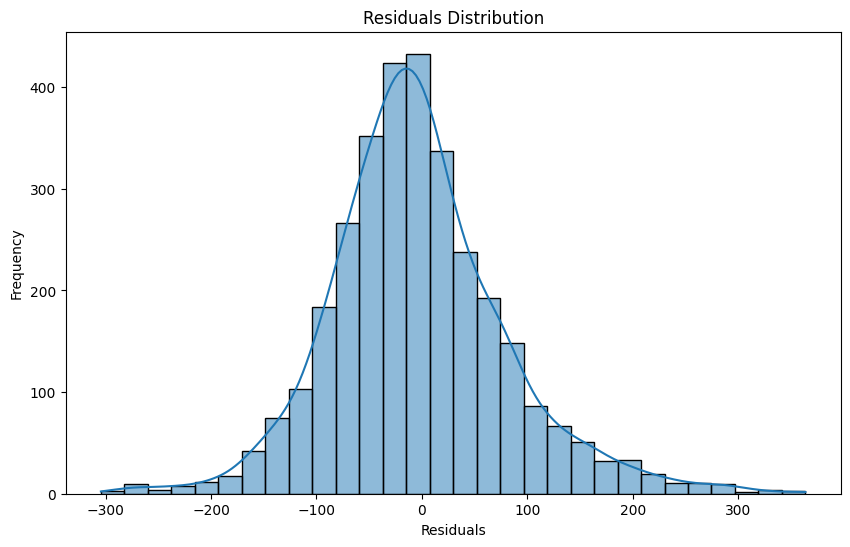

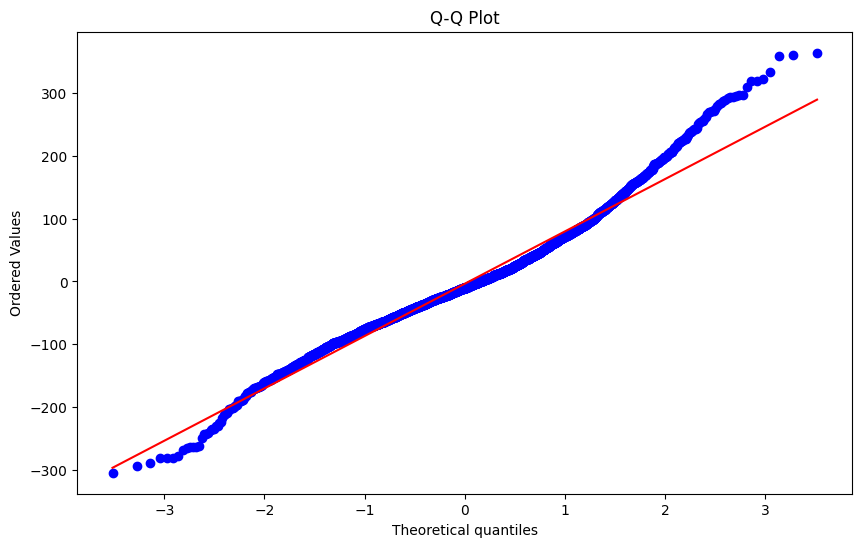

In [28]:
# Calculate residuals
from scipy import stats


residuals = y_test - rf_predictions

# Plotting the residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for normality check
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for ')
plt.show()

In [30]:
import shap
shap_values = shap.TreeExplainer(rf_model).shap_values(X_test)
shap_interaction_values = shap.TreeExplainer(rf_model).shap_interaction_values(
    X_test
)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=df_train.drop(columns=['OilPeakRate']).columns)
shap.summary_plot(shap_values, X_test, feature_names=df_train.drop(columns=['OilPeakRate']).columns)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
